# Gibbs Sampling

## Basic Implimenataion

A particular Markov chain algorithm that has been found useful in many multidimensional problems is the Gibbs sampler, also called alternating conditional sampling, which is defined in terms of subvectors of $\theta$.

We first divide the parameter vector to its subvectors $\theta = (\theta_{1}, ... \theta_{d})$.

Each iteration of the Gibbs sampler cycles through the subvectors of $\theta$, drawing each subset conditional on the value of all the others. There are thus $d$ steps in iteration $t$. At each iteration $t$, an ordering of the d subvectors of $\theta$ is chosen and, in turn, each $\theta_{j}^{t}$ is sampled from the conditional distribution given all the other components of $\theta$

$$
p(\theta_j | \theta_{-j}^{t-1}, y)
$$
where $\theta_{-j}^{t-1}$, represents all the components of $\theta$ except for $\theta_j$:

$$
\theta_{-j}^{t-1} = (\theta_{1}^{t}, \theta_{2}^{t}, ... ,\theta_{j-1}^{t}, \theta_{j+1}^{t-1}, .... \theta_{d}^{t-1})
$$

We sample out $\theta_{j}$, conditioned on the value  of other parameters obtained up till now. It is quite useful in multidimensional cases, where the conditional distribution is easy to get.

## Simple Example:-
**Bivariate Normal Distribution**

We will use the same example as in metropolis sampling example to check gibbs sampling. We will sample out a bivariate normal distribution.

\begin{align}
\begin{bmatrix} \theta_{1} \\ \theta_{2} \end{bmatrix} \bigg| y \sim N \left( \begin{bmatrix} y_1 \\ y_2 \end{bmatrix} , \begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix}  \right)
\end{align}


We know that for a multivariate gaussian distribution, the conditional is found by (for $\Lambda$ being the precision matrix):

\begin{align}
x = \begin{bmatrix} x_a \\ x_b \end{bmatrix} \; \mu = \begin{bmatrix} \mu_{a} \\ \mu_{b} \end{bmatrix} \; \Lambda = \begin{bmatrix} \Lambda_{aa} & \Lambda_{ab} \\ \Lambda_{ba} & \Lambda_{bb} \end{bmatrix}
\end{align}


\begin{align}
p( \mathbb{x}_{a} | \mathbb{x}_b ) =  \mathcal{N}( \mathbb{x} | \mu_{a|b}, \Lambda^{-1}_{a a}  ) \\
\mathbb{\mu}_{a|b} = \mu_{a} - \Lambda^{-1}_{a a} \Lambda_{a b} ( x_b - \mu_{b} )
\end{align}

Also, in our case:

\begin{align}
\Sigma = \begin{bmatrix} 1 & \rho \\ \rho & 1 \end{bmatrix} \implies \Lambda = \begin{bmatrix} \frac{1}{1-\rho^{2}} & \frac{-\rho}{1-\rho^{2}} \\ \frac{-\rho}{1-\rho^{2}} & \frac{1}{1-\rho^{2}} \end{bmatrix}

\end{align}

Hense, we get 
\begin{align}
p( \theta_{a} | \theta_{b}, y) =  \mathcal{N}( y_1 + \rho (\theta_2 - y_2 ) , 1 - \rho^2 ) \\
p( \theta_{b} | \theta_{a}, y) =  \mathcal{N}( y_2 + \rho (\theta_1 - y_1 ) , 1 - \rho^2 )
\end{align}

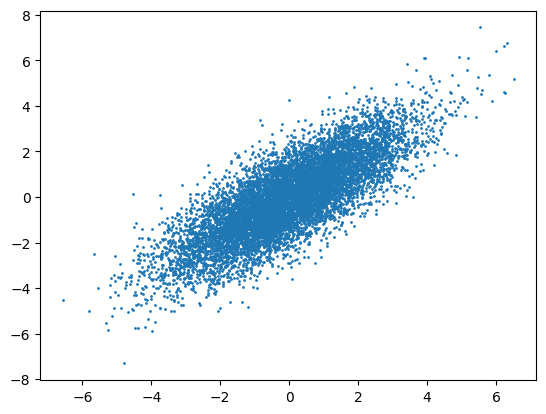

In [4]:
# Making a simple implementation of Gibbs Sampling
# Find gibbs equation for any multivariate normal distribution***
import numpy as np
import matplotlib.pyplot as plt

def gibbs_sampler(theta0, n_samples, burn_in, sigma, mu, rho):
    """
    Gibbs Sampling for a bivariate normal distribution
    """
    # Initialize
    theta = np.zeros((n_samples, 2))
    theta[0, :] = theta0

    # Burn-in
    for i in range(burn_in):
        theta[0, :] = np.random.multivariate_normal(mean=mu, cov=sigma)

    # Gibbs Sampling
    for i in range(1, n_samples):
        theta[i, 0] = np.random.normal(loc=mu[0] + rho[0, 1] * (theta[i-1, 1] - mu[1]), scale=sigma[0, 0])
        theta[i, 1] = np.random.normal(loc=mu[1] + rho[1, 0] * (theta[i, 0] - mu[0]), scale=sigma[1, 1])

    return theta

# Parameters
theta0 = np.array([0, 0])
n_samples = 10000
burn_in = 1000
sigma = np.array([[1, 0.8], [0.8, 1]])
mu = np.array([0, 0])
rho = np.array([[1, 0.8], [0.8, 1]])

# Run Gibbs Sampler
theta = gibbs_sampler(theta0, n_samples, burn_in, sigma, mu, rho)

# Plot
plt.scatter(theta[:, 0], theta[:, 1], s=1)
plt.show()


## Importance of Gibbs Sampler

Gibbs sampler seems to have a problem, the problem of getting the conditioned mean is indeed not straightforward in many case (eg: the example above), but we still make use of it as works much better than ordinary MCMC in High Dimensions.

Why might that be the case??

The reason being that in higher dimensions, the acceptance probability of proposals reduces exponentially. Think of it in general terms as if we are going away from the mode, the ratio of pdf values (or p), will we be say r in each direction, then the ratio becomes $r^d$ for d directions, hence reducing significantly. Whereas in Gibbs sampling we are updating the chain in one dimension at a time, hense we mitigate this problem of exponentially reducing acceptance.